In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Food_Production.csv")
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [3]:
df.shape

(43, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [5]:
df['Food product'].unique()

array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [6]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

### Business Questions

Q1. Which food products contribute the most to total greenhouse gas emissions?

Hypothesis: Animal-based foods (especially red meats like beef and lamb) will dominate the top contributors to emissions, while plant-based staples (grains, legumes) will rank among the lowest.

Q2. How do animal-based vs. plant-based foods differ in carbon, water, and land use impacts?

Hypothesis: Animal-based foods will show significantly higher GHG emissions, water use, and land use compared to plant-based foods, even when adjusted per kilogram or per protein.

Q3. What food products require the highest water withdrawals per kilogram?

Hypothesis: Rice, nuts (like almonds), and some fruits will have extremely high freshwater withdrawals compared to cereals and pulses. Beef and dairy will also rank high due to water-intensive feed.

Q4. Which foods have the largest land footprint per kg and per 100g protein?

Hypothesis: Beef, lamb, and dairy products will require the largest land use per kg and per protein, while lentils and peas will have a much smaller footprint.

Q5. How does processing & transportation compare to farming in contributing to emissions?

Hypothesis: Farming will account for the majority of emissions, while processing and transport will contribute relatively little (<15% of total emissions) for most products.

Q6. Are there foods that provide high protein with relatively low environmental cost?

Hypothesis: Legumes (lentils, peas, beans) and some cereals will deliver high protein with lower emissions, land, and water footprints compared to animal protein.

Q7. What are the top 10 most sustainable foods (lowest emissions + water + land use combined)?

Hypothesis: Plant-based staples (potatoes, oats, peas, lentils, maize) will appear in the top 10, while animal-based foods will dominate the bottom sustainability rankings.

### categorizing food into plant_based and animal_based

In [7]:
category_map = {
    # Plant-based
    "Wheat & Rye (Bread)": "Plant-based",
    "Maize (Meal)": "Plant-based",
    "Barley (Beer)": "Plant-based",
    "Oatmeal": "Plant-based",
    "Rice": "Plant-based",
    "Potatoes": "Plant-based",
    "Cassava": "Plant-based",
    "Cane Sugar": "Plant-based",
    "Beet Sugar": "Plant-based",
    "Other Pulses": "Plant-based",
    "Peas": "Plant-based",
    "Nuts": "Plant-based",
    "Groundnuts": "Plant-based",
    "Soymilk": "Plant-based",
    "Tofu": "Plant-based",
    "Soybean Oil": "Plant-based",
    "Palm Oil": "Plant-based",
    "Sunflower Oil": "Plant-based",
    "Rapeseed Oil": "Plant-based",
    "Olive Oil": "Plant-based",
    "Tomatoes": "Plant-based",
    "Onions & Leeks": "Plant-based",
    "Root Vegetables": "Plant-based",
    "Brassicas": "Plant-based",
    "Other Vegetables": "Plant-based",
    "Citrus Fruit": "Plant-based",
    "Bananas": "Plant-based",
    "Apples": "Plant-based",
    "Berries & Grapes": "Plant-based",
    "Wine": "Plant-based",
    "Other Fruit": "Plant-based",
    "Coffee": "Plant-based",
    "Dark Chocolate": "Plant-based",

    # Animal-based
    "Beef (beef herd)": "Animal-based",
    "Beef (dairy herd)": "Animal-based",
    "Lamb & Mutton": "Animal-based",
    "Pig Meat": "Animal-based",
    "Poultry Meat": "Animal-based",
    "Milk": "Animal-based",
    "Cheese": "Animal-based",
    "Eggs": "Animal-based",
    "Fish (farmed)": "Animal-based",
    "Shrimps (farmed)": "Animal-based",
}


In [8]:
df["Category"] = df["Food product"].map(category_map)
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plant-based
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plant-based
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plant-based
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461,Plant-based
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480,Plant-based


### Q1

In [9]:
top10_emissions = df.nlargest(10, "Total_emissions")[["Food product", "Total_emissions", "Category"]]
top10_emissions

,Food product,Total_emissions,Category
33,Beef (beef herd),59.6,Animal-based
35,Lamb & Mutton,24.5,Animal-based
39,Cheese,21.2,Animal-based
34,Beef (dairy herd),21.1,Animal-based
32,Dark Chocolate,18.7,Plant-based
31,Coffee,16.5,Plant-based
42,Shrimps (farmed),11.8,Animal-based
16,Palm Oil,7.6,Plant-based
36,Pig Meat,7.2,Animal-based
37,Poultry Meat,6.1,Animal-based


### Visualize the top 10 emission contributors

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


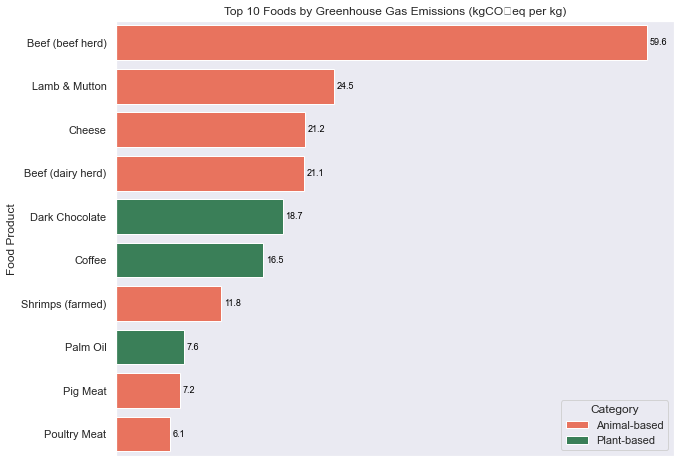

In [13]:
# Set theme
sns.set_theme(style="darkgrid")

# Custom color palette (Animal = red, Plant = green)
palette = {"Animal-based": "tomato", "Plant-based": "seagreen"}

# Plot
plt.figure(figsize=(10,8))
ax = sns.barplot(
    data=top10_emissions.sort_values("Total_emissions", ascending=False),  # sort highest first
    x="Total_emissions", 
    y="Food product",
    hue="Category",
    dodge=False,
    palette=palette
)

# Add manual data labels
for i, (value, category) in enumerate(zip(top10_emissions.sort_values("Total_emissions", ascending=False)["Total_emissions"],
                                          top10_emissions.sort_values("Total_emissions", ascending=False)["Category"])):
    ax.text(value + 0.3, i, f"{value:.1f}", va="center", ha="left", fontsize=9, color="black")

# Title
plt.title("Top 10 Foods by Greenhouse Gas Emissions (kgCO₂eq per kg)")

# Remove x-axis label and ticks
plt.xlabel("")
plt.xticks([])

# Y-label
plt.ylabel("Food Product")

# Legend
plt.legend(title="Category")

plt.show()